In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [1]:
data_dir = 'C:/Users/Windows10/Desktop/코딩/data/image_classification'
train_dir = os.path.join(data_dir, 'seg_train/seg_train')
val_dir = os.path.join(data_dir, 'seg_test/seg_test')

pred_dir = os.path.join(data_dir, 'seg_pred/seg_pred')

In [5]:
classes = os.listdir(train_dir)
print(classes)

['buildings', 'forest', 'sea', 'mountain', 'glacier', 'street']


In [6]:
num_data = {}
for place in classes:
    num_data[place] = len(glob(os.path.join(train_dir, place + '/*')))

print(num_data)

{'buildings': 2191, 'forest': 2271, 'sea': 2274, 'mountain': 2512, 'glacier': 2404, 'street': 2382}


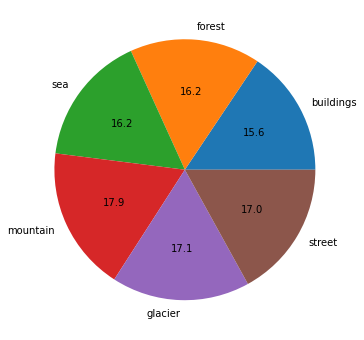

In [7]:
plt.figure(figsize = (8,6))
plt.pie(num_data.values(), labels = classes, autopct='%.1f')
plt.show()

In [8]:
batch_size = 32
input_shape = (180, 180)

In [9]:
train_datagen = ImageDataGenerator(rescale= 1./255, horizontal_flip= True, zoom_range = 0.4, shear_range= 0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_ds = train_datagen.flow_from_directory(train_dir, shuffle = True, target_size = input_shape, batch_size = batch_size, class_mode = 'sparse')
print(len(train_ds))

Found 14034 images belonging to 6 classes.
439


In [11]:
val_ds = test_datagen.flow_from_directory(val_dir, shuffle= True, target_size = input_shape, batch_size = batch_size, class_mode = 'sparse')

Found 3000 images belonging to 6 classes.


In [12]:
prediction_imgs = list(glob(os.path.join(pred_dir, '*')))

len(prediction_imgs)

7301

In [13]:
def get_data(path):
    x = []
    for i in path:
        img = load_img(i, target_size = (180, 180), color_mode = 'rgb')
        img = img_to_array(img)
        img /= 255
        x.append(img)
    x = np.asarray(x)
    return x

In [14]:
test_ds = get_data(prediction_imgs)

In [15]:
test_ds.shape

(7301, 180, 180, 3)

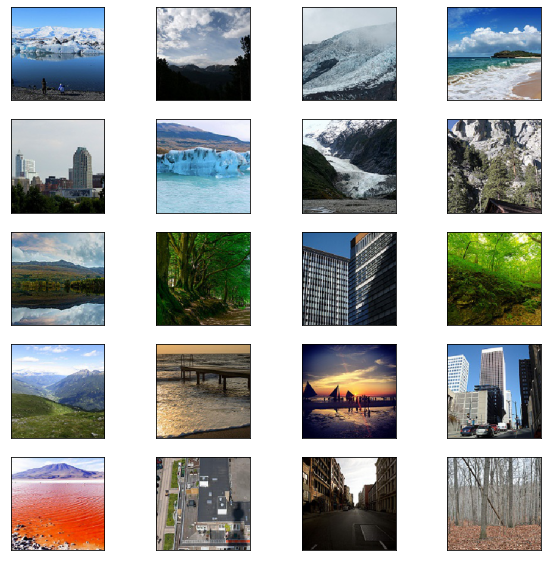

In [16]:
plt.figure(figsize = (10, 10))
for i in range(20):
    plt.subplot(5, 4, i + 1)
    plt.imshow(test_ds[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [17]:
input_shape = input_shape + (3,)

In [18]:
model = Sequential([
    Conv2D(64, 4, activation = 'relu', input_shape = input_shape),
    MaxPool2D(pool_size = (2,2)),
    Conv2D(128, 4, activation = 'relu'),
    MaxPool2D(pool_size = (2,2)),
    Conv2D(64, 4, activation = 'relu'),
    MaxPool2D(pool_size = (2,2)),
    Conv2D(64, 4, activation = 'relu'),
    MaxPool2D(pool_size = (2,2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.4),
    Dense(6, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 177, 177, 64)      3136      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 88, 88, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 128)       131200    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 64)        131136    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        6

In [19]:
model.compile(optimizer = 'adam', loss=  'sparse_categorical_crossentropy', metrics= ['acc'])

In [20]:
history = model.fit(train_ds, steps_per_epoch= len(train_ds), epochs = 10, validation_data = val_ds)

Epoch 1/10
439/439 [==============================] - 178s 336ms/step - loss: 1.1949 - acc: 0.5151 - val_loss: 0.9411 - val_acc: 0.6093
Epoch 2/10
439/439 [==============================] - 145s 330ms/step - loss: 0.9636 - acc: 0.6216 - val_loss: 0.8258 - val_acc: 0.6880
Epoch 3/10
439/439 [==============================] - 146s 332ms/step - loss: 0.8281 - acc: 0.6905 - val_loss: 0.6647 - val_acc: 0.7547
Epoch 4/10
439/439 [==============================] - 145s 330ms/step - loss: 0.7338 - acc: 0.7356 - val_loss: 0.6333 - val_acc: 0.7600
Epoch 5/10
439/439 [==============================] - 146s 332ms/step - loss: 0.6622 - acc: 0.7617 - val_loss: 0.5227 - val_acc: 0.8100
Epoch 6/10
439/439 [==============================] - 146s 332ms/step - loss: 0.6190 - acc: 0.7812 - val_loss: 0.5503 - val_acc: 0.7983
Epoch 7/10
439/439 [==============================] - 145s 331ms/step - loss: 0.5912 - acc: 0.7906 - val_loss: 0.4676 - val_acc: 0.8290
Epoch 8/10
439/439 [============================

In [3]:
print(history.history)

NameError: name 'history' is not defined